In [1]:
pip install fbprophet -U

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Dataset

In [2]:
# monthly-car-sales.csv
# Location: https://mitu.co.in/dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the data

In [6]:
df = pd.read_csv('datasets/monthly-car-sales.csv',
                header=0)

In [9]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [10]:
df

,ds,y
0,2013-01-01,6550
1,2013-02-01,8728
2,2013-03-01,12026
3,2013-04-01,14395
4,2013-05-01,14587
...,...,...
103,2021-08-01,16722
104,2021-09-01,14385
105,2021-10-01,21342
106,2021-11-01,17180


In [11]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

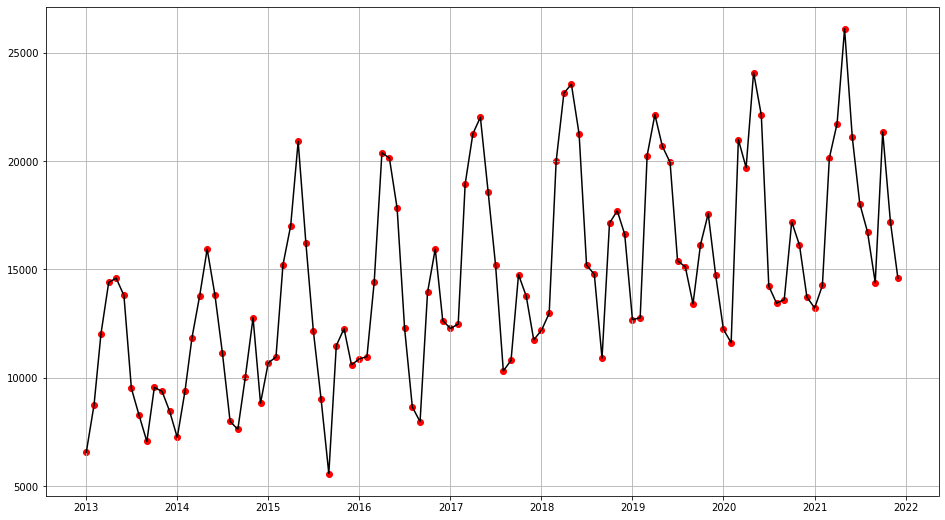

In [14]:
# explore the data
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(df['ds'], df['y'], color='r')
plt.plot(df['ds'], df['y'], color='k')

In [15]:
from fbprophet import Prophet

In [18]:
model = Prophet(weekly_seasonality=True,
                daily_seasonality=True)

In [19]:
model.fit(df)

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [20]:
df

,ds,y
0,2013-01-01,6550
1,2013-02-01,8728
2,2013-03-01,12026
3,2013-04-01,14395
4,2013-05-01,14587
...,...,...
103,2021-08-01,16722
104,2021-09-01,14385
105,2021-10-01,21342
106,2021-11-01,17180


In [28]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2022-%02d' % i
    future.append([date])

In [29]:
future

[['2022-01'],
 ['2022-02'],
 ['2022-03'],
 ['2022-04'],
 ['2022-05'],
 ['2022-06'],
 ['2022-07'],
 ['2022-08'],
 ['2022-09'],
 ['2022-10'],
 ['2022-11'],
 ['2022-12']]

In [30]:
future = pd.DataFrame(future)

In [31]:
future

,0
0,2022-01
1,2022-02
2,2022-03
3,2022-04
4,2022-05
5,2022-06
6,2022-07
7,2022-08
8,2022-09
9,2022-10


In [32]:
future.columns = ['ds']

In [33]:
future

,ds
0,2022-01
1,2022-02
2,2022-03
3,2022-04
4,2022-05
5,2022-06
6,2022-07
7,2022-08
8,2022-09
9,2022-10


In [34]:
future['ds']= pd.to_datetime(future['ds'])

In [35]:
future

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [36]:
# use the model to make a forecast
forecast = model.predict(future)

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,16099.402342,14057.252937,17148.519404,16099.323668,16099.402342,-506.942515,-506.942515,-506.942515,2050.959014,...,224.714637,224.714637,224.714637,-2782.616166,-2782.616166,-2782.616166,0.0,0.0,0.0,15592.459827
1,2022-02-01,16158.340432,13995.079474,17057.212559,16157.231026,16159.464923,-623.161653,-623.161653,-623.161653,2050.959014,...,-498.110575,-498.110575,-498.110575,-2176.010092,-2176.010092,-2176.010092,0.0,0.0,0.0,15535.178780
2,2022-03-01,16211.574837,19490.913664,22491.096763,16208.634306,16214.433771,4740.866218,4740.866218,4740.866218,2050.959014,...,-498.110575,-498.110575,-498.110575,3188.017779,3188.017779,3188.017779,0.0,0.0,0.0,20952.441055
3,2022-04-01,16270.512928,22823.433405,25795.106423,16265.525422,16275.633440,8044.929485,8044.929485,8044.929485,2050.959014,...,451.060287,451.060287,451.060287,5542.910184,5542.910184,5542.910184,0.0,0.0,0.0,24315.442412
4,2022-05-01,16327.549789,24233.105648,27286.284891,16320.358364,16334.525992,9370.908839,9370.908839,9370.908839,2050.959014,...,503.809759,503.809759,503.809759,6816.140067,6816.140067,6816.140067,0.0,0.0,0.0,25698.458629
5,2022-06-01,16386.487880,19943.777972,23038.252803,16376.553908,16396.666149,5109.621921,5109.621921,5109.621921,2050.959014,...,-763.402476,-763.402476,-763.402476,3822.065383,3822.065383,3822.065383,0.0,0.0,0.0,21496.109801
6,2022-07-01,16443.524742,17254.854727,20078.458165,16430.493957,16456.515203,2224.659739,2224.659739,2224.659739,2050.959014,...,451.060287,451.060287,451.060287,-277.359562,-277.359562,-277.359562,0.0,0.0,0.0,18668.184481
7,2022-08-01,16502.462833,14438.042039,17370.410812,16485.517908,16518.765909,-564.726132,-564.726132,-564.726132,2050.959014,...,-80.520417,-80.520417,-80.520417,-2535.164729,-2535.164729,-2535.164729,0.0,0.0,0.0,15937.736701
8,2022-09-01,16561.400923,12891.561814,15903.133168,16540.890684,16581.069711,-2243.514249,-2243.514249,-2243.514249,2050.959014,...,162.448785,162.448785,162.448785,-4456.922048,-4456.922048,-4456.922048,0.0,0.0,0.0,14317.886674
9,2022-10-01,16618.437785,17319.396697,20483.652463,16593.333497,16642.486781,2286.322720,2286.322720,2286.322720,2050.959014,...,224.714637,224.714637,224.714637,10.649069,10.649069,10.649069,0.0,0.0,0.0,18904.760505


In [39]:
# summarize the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,15592.459827,14057.252937,17148.519404
1,2022-02-01,15535.178780,13995.079474,17057.212559
2,2022-03-01,20952.441055,19490.913664,22491.096763
3,2022-04-01,24315.442412,22823.433405,25795.106423
4,2022-05-01,25698.458629,24233.105648,27286.284891
5,2022-06-01,21496.109801,19943.777972,23038.252803
6,2022-07-01,18668.184481,17254.854727,20078.458165
7,2022-08-01,15937.736701,14438.042039,17370.410812
8,2022-09-01,14317.886674,12891.561814,15903.133168
9,2022-10-01,18904.760505,17319.396697,20483.652463


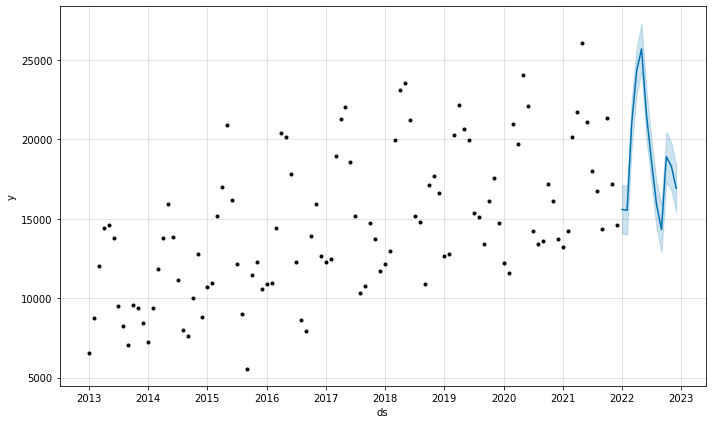

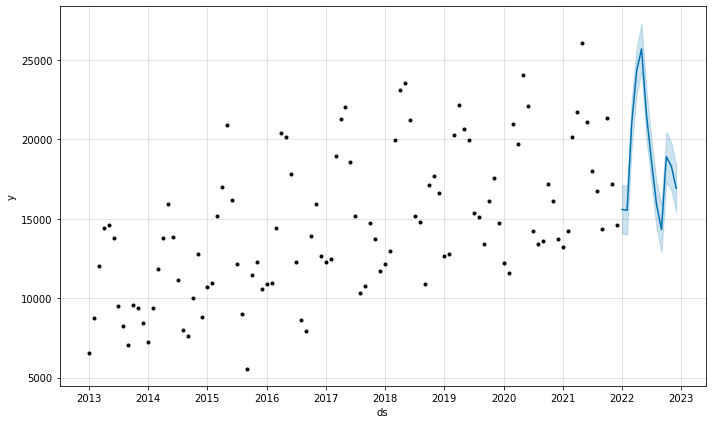

In [42]:
model.plot(forecast)

In [51]:
df

,ds,y
0,2013-01-01,6550
1,2013-02-01,8728
2,2013-03-01,12026
3,2013-04-01,14395
4,2013-05-01,14587
...,...,...
103,2021-08-01,16722
104,2021-09-01,14385
105,2021-10-01,21342
106,2021-11-01,17180


In [55]:
forecast['y'] = forecast['yhat']

In [56]:
newdf = pd.concat([df,forecast[['ds','y']]])

In [57]:
newdf

,ds,y
0,2013-01-01,6550.000000
1,2013-02-01,8728.000000
2,2013-03-01,12026.000000
3,2013-04-01,14395.000000
4,2013-05-01,14587.000000
...,...,...
7,2022-08-01,15937.736701
8,2022-09-01,14317.886674
9,2022-10-01,18904.760505
10,2022-11-01,18303.843098


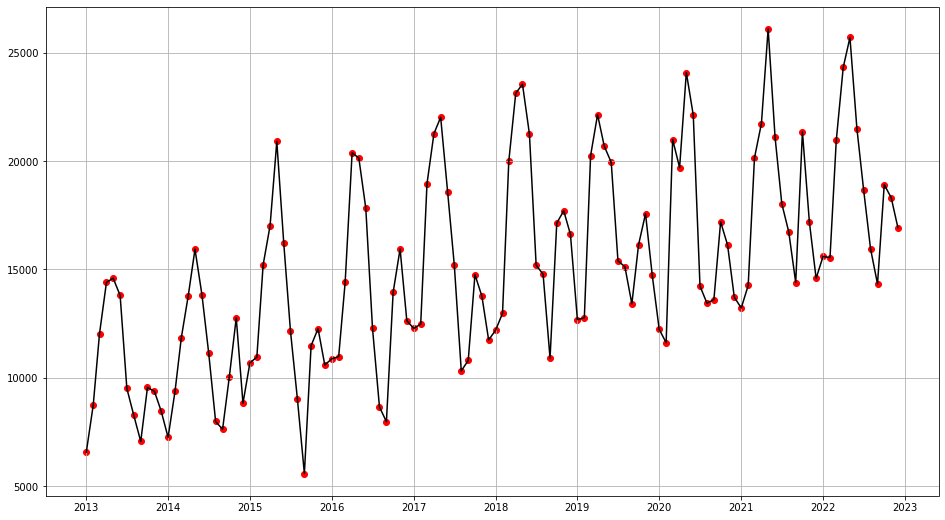

In [59]:
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'], newdf['y'], color='r')
plt.plot(newdf['ds'], newdf['y'], color='k')
#plt.plot(forecast['yhat']);

In [60]:
future = list()
for i in range(1, 13):
    date = '2022-%02d' % i
    future.append([date])
for i in range(1, 13):
    date = '2023-%02d' % i
    future.append([date])
for i in range(1, 13):
    date = '2024-%02d' % i
    future.append([date])
for i in range(1, 13):
    date = '2025-%02d' % i
    future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [61]:
future

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [62]:
forecast = model.predict(future)

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


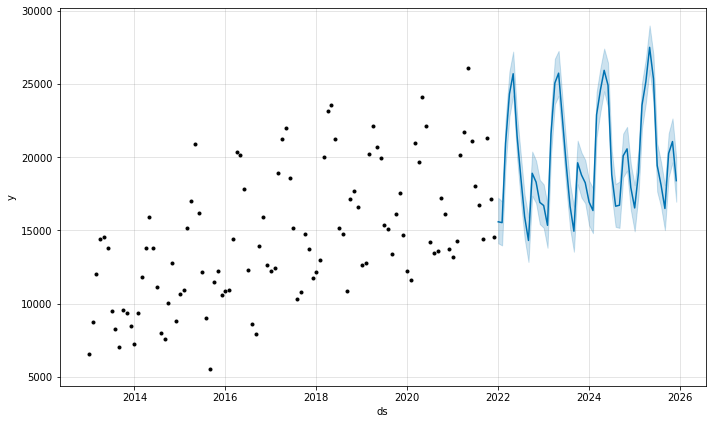

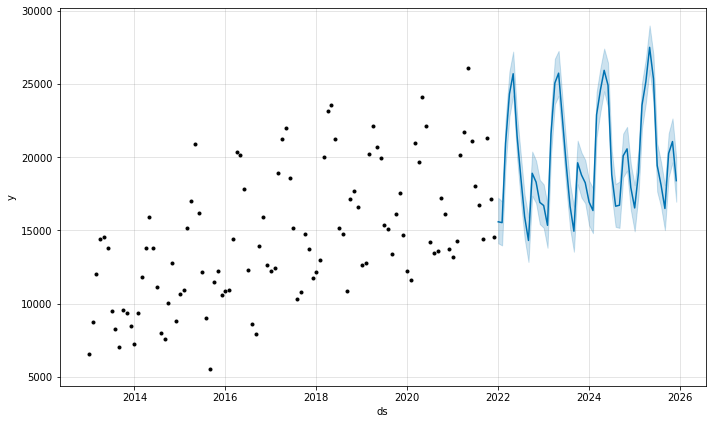

In [64]:
model.plot(forecast)

In [65]:
forecast['y'] = forecast['yhat']
newdf = pd.concat([df,forecast[['ds','y']]])

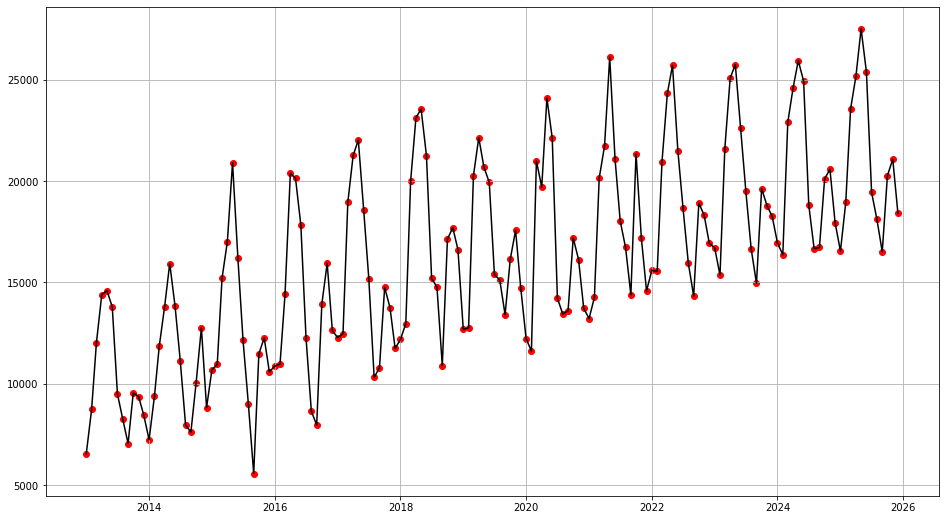

In [75]:
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'], newdf['y'], color='r')
plt.plot(newdf['ds'], newdf['y'], color='k')

In [70]:
list(range(2012,2027,1))

[2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026]

In [76]:
df = pd.read_csv('datasets/sealevel.csv')

In [77]:
df

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [149]:
sea = pd.read_csv('datasets/sealevel.csv')

In [150]:
sea = sea[['Year','GMSL_noGIA']]

In [151]:
gr = sea.groupby('Year')

In [152]:
gr.groups;

In [153]:
newdf = pd.DataFrame({
    'ds': gr.mean().index,
    'y': gr.mean()['GMSL_noGIA']
})

In [154]:
newdf

,ds,y
Year,,
1993,1993,-34.605405
1994,1994,-30.951081
1995,1995,-28.645946
1996,1996,-26.596389
1997,1997,-22.682432
1998,1998,-25.060541
1999,1999,-21.812432
2000,2000,-18.425405
2001,2001,-13.219189


In [156]:
pd.to_datetime(newdf['ds'], format='%Y')

Year
1993   1993-01-01
1994   1994-01-01
1995   1995-01-01
1996   1996-01-01
1997   1997-01-01
1998   1998-01-01
1999   1999-01-01
2000   2000-01-01
2001   2001-01-01
2002   2002-01-01
2003   2003-01-01
2004   2004-01-01
2005   2005-01-01
2006   2006-01-01
2007   2007-01-01
2008   2008-01-01
2009   2009-01-01
2010   2010-01-01
2011   2011-01-01
2012   2012-01-01
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-01-01
2017   2017-01-01
2018   2018-01-01
2019   2019-01-01
2020   2020-01-01
2021   2021-01-01
Name: ds, dtype: datetime64[ns]

In [115]:
# prepare expected column names
newdf.columns = ['ds', 'y']
newdf['ds']= pd.to_datetime(newdf['ds'], format='%Y')

In [117]:
newdf

,ds,y
Year,,
1993,1993-01-01,-34.605405
1994,1994-01-01,-30.951081
1995,1995-01-01,-28.645946
1996,1996-01-01,-26.596389
1997,1997-01-01,-22.682432
1998,1998-01-01,-25.060541
1999,1999-01-01,-21.812432
2000,2000-01-01,-18.425405
2001,2001-01-01,-13.219189


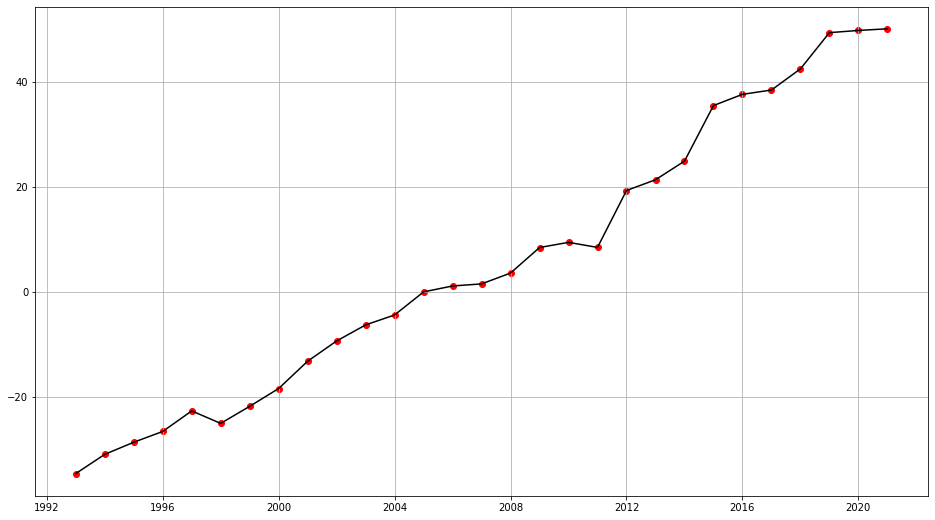

In [118]:
# explore the data
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'], newdf['y'], color='r')
plt.plot(newdf['ds'], newdf['y'], color='k')

In [121]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True)
model.fit(newdf)

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [144]:
# define the period for which we want a prediction
future = list()
for i in range(2022, 2031):
    date = str(i)
    future.append([date])

In [145]:
future

[['2022'],
 ['2023'],
 ['2024'],
 ['2025'],
 ['2026'],
 ['2027'],
 ['2028'],
 ['2029'],
 ['2030']]

In [130]:
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'], format='%Y')

In [131]:
future

,ds
0,2022-01-01
1,2023-01-01
2,2024-01-01
3,2025-01-01
4,2026-01-01
5,2027-01-01
6,2028-01-01
7,2029-01-01
8,2030-01-01


In [132]:
forecast = model.predict(future)

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


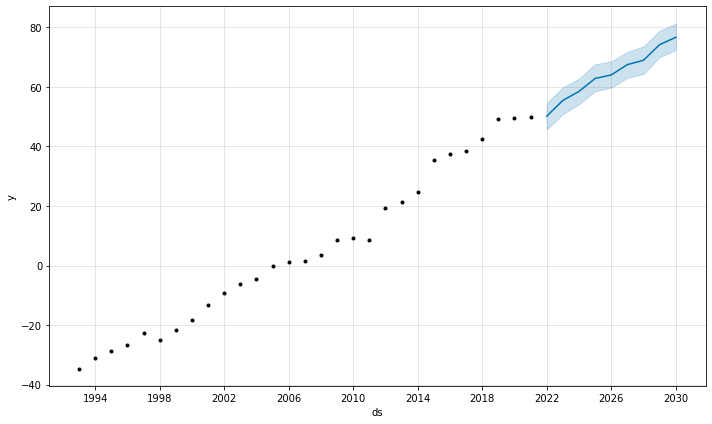

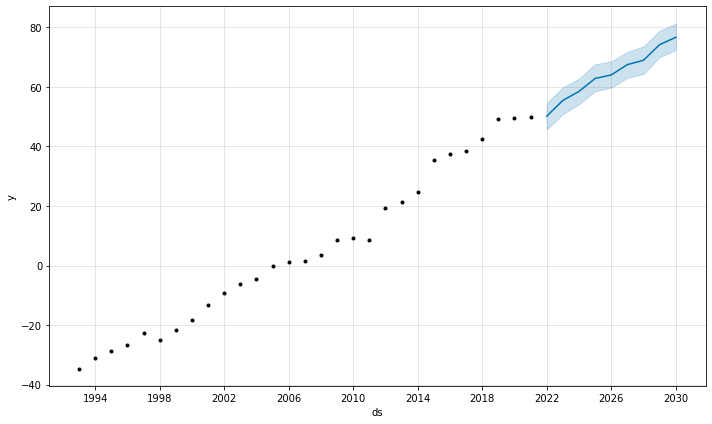

In [134]:
model.plot(forecast)